# Contents
1. Import Libraries & Data Set 
    - Rename columns 
2. Create a correlation matrix heatmap
3. Crete a scatterplot
4. Create a pair plot
5. Creatae a categorical plot
6. Additional Questions
7. Hypotheses
8. Export Data frame 

# Import Libraries and Data Set 

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Create a path 
path = r'/Users/ATeam/Desktop/CF/Achievement 6 - Applied analytics/Air Pollution'

In [5]:
# Import data set 
df_air_pollution = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'air_pollution_clean.csv'))

In [6]:
# Check Data Set 
df_air_pollution.head()

,Unnamed: 0,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


In [42]:
#Rename columns 
df_air_pollution.rename(columns={'Entity': 'Country', 'Air pollution (total) (deaths per 100,000)': 'Air pollution total deaths', 'Indoor air pollution (deaths per 100,000)': 'Indoor air pollution deaths', 'Outdoor particulate matter (deaths per 100,000)': 'Outdoor particule matter deaths', 'Outdoor ozone pollution (deaths per 100,000)': 'Outdoor ozone pollution deaths'}, inplace=True)

In [43]:
#Check columns were renamed correctly 
df_air_pollution.head()

,Unnamed: 0,Country,Code,Year,Air pollution total deaths,Indoor air pollution deaths,Outdoor particule matter deaths,Outdoor ozone pollution deaths
0,0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


# Question 3: Create a correlation matrix heatmap (colored)

In [45]:
# Create a subset excluding the "Date" and "No" columns

sub = df_air_pollution[['Year', 'Air pollution total deaths', 
                        'Indoor air pollution deaths', 'Outdoor particule matter deaths',
                       'Outdoor ozone pollution deaths']]

In [46]:
# Check sub 
sub

,Year,Air pollution total deaths,Indoor air pollution deaths,Outdoor particule matter deaths,Outdoor ozone pollution deaths
0,1990,299.477309,250.362910,46.446589,5.616442
1,1991,291.277967,242.575125,46.033841,5.603960
2,1992,278.963056,232.043878,44.243766,5.611822
3,1993,278.790815,231.648134,44.440148,5.655266
4,1994,287.162923,238.837177,45.594328,5.718922
...,...,...,...,...,...
6463,2013,143.850145,113.456097,27.589603,4.426291
6464,2014,138.200536,108.703566,26.760618,4.296971
6465,2015,132.752553,104.340506,25.715415,4.200907
6466,2016,128.692138,100.392287,25.643570,4.117173


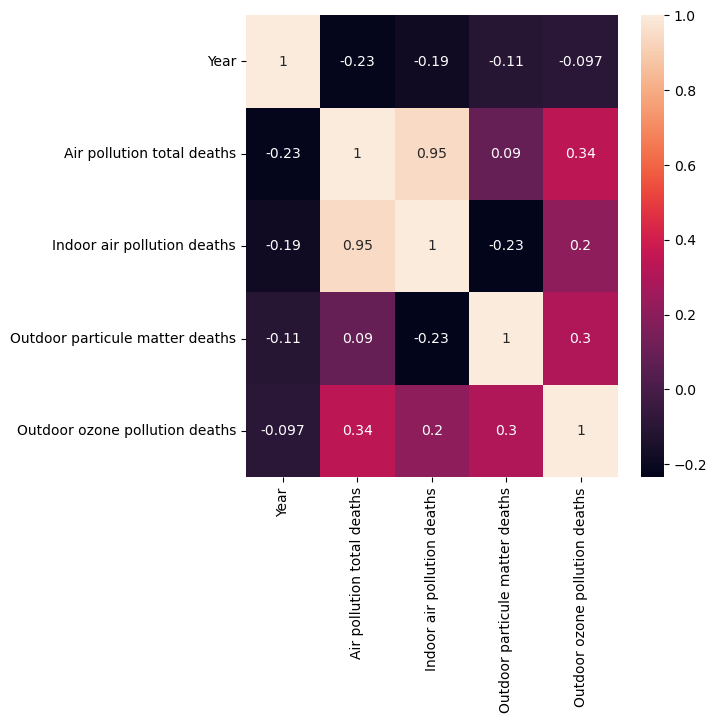

In [47]:
# Create a subplot 
f,ax = plt.subplots(figsize=(6,6))

# Create the correlation heatmap matrix
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

The only stong relationship is between indoor air deaths and air pollution deaths, which is a very strong relationship. This tells me that as indoor air pollution deaths increase it rises the air pollution death total greatly. 

There are weak to moderate relationships between air pollution deaths and outdoor ozone pollution deaths and outdoor ozone pollution deaths and outdoor outdoor particulate matter deaths, but the relationships are no strong enough to explore further. 

All other variable relationships are weak or have no relationship. 

# Question 4: Create a scatterplot

/Users/ATeam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


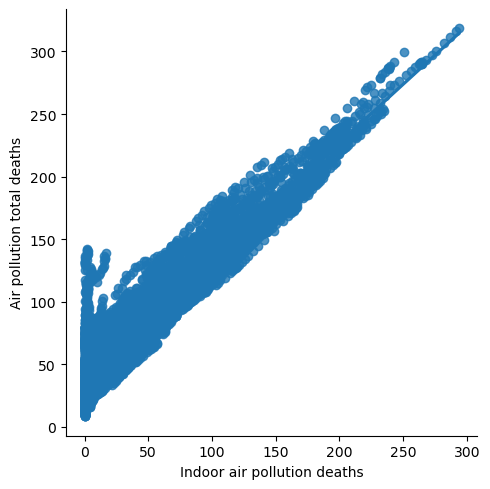

In [48]:
# Create a scatterplot for the 'Indoor air pollution death totals' and 'Air pollution total deaths' columns 

sns.lmplot(x = 'Indoor air pollution deaths', y = 'Air pollution total deaths', data = df_air_pollution)

There is a very linear trend between the two variables. Almost all points are very close to the trend line. 

There are some points where Air pollution deaths reach as high as 150 where Indoor air pollution deaths reaim at or near zero but there are no outliers as the death totals increase. 

Finally, there are fewer and fewer points as deaths tolls increase. 

# Question 5 - Create a pair plot 

/Users/ATeam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


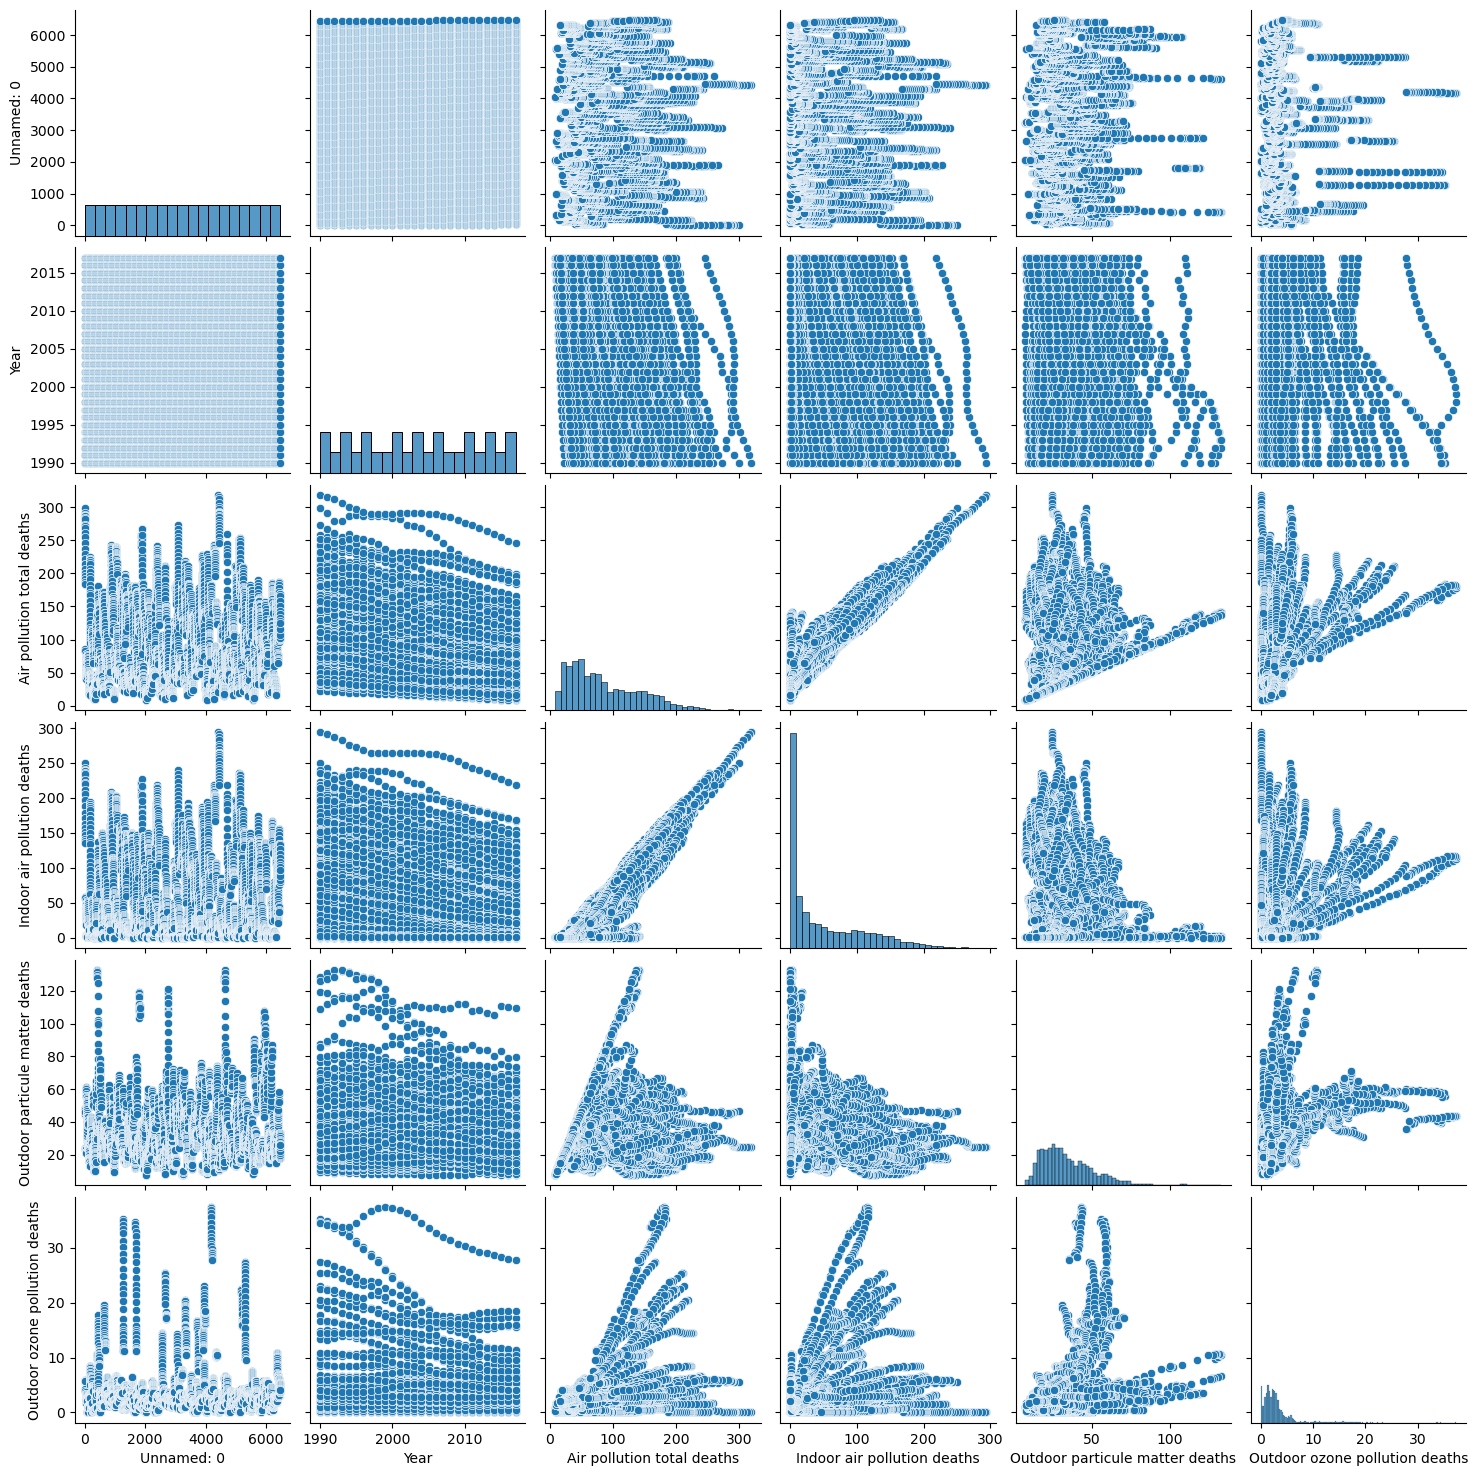

In [49]:
# Create a pair plot 

g = sns.pairplot(df_air_pollution)

This confirms all of the takeaways from the correlation heatmap. 

# Question 6 - Create a categorical plot

<Axes: xlabel='Air pollution total deaths', ylabel='Count'>

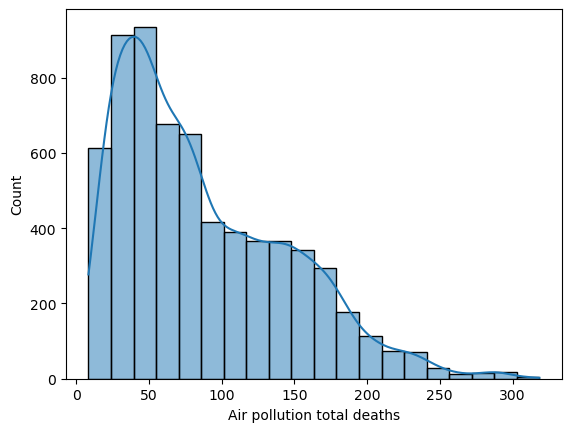

In [50]:
# Create a categorical plot for the 'Air pollution total deaths'
sns.histplot(df_air_pollution['Air pollution total deaths'], bins = 20, kde = True)

There are many more instances were countries have expereinced fewer than 60 deaths per year. There is a downward trend in instances of death once we get past 60 with a steep decline after 80. 

# Question 7 -- Additional Questions 

Why are there less instances of larger death totals? 

# Question 8 -- Hypotheses

1. Countries with the largest indoor polution deaths with have the largest death totals. 

2. The total number of deaths will not increase over time.  

# Export data frame

In [51]:
df_air_pollution.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'air_pollution_2.csv'))

In [52]:
pwd

'/Users/ATeam'